Load and Label the Data:

In [1]:
import pandas as pd

# List of filenames with the correct folder path
csv_files = ['Csv/F0L.csv', 'Csv/F0M.csv', 'Csv/F1L.csv', 'Csv/F1M.csv',
             'Csv/F2L.csv', 'Csv/F2M.csv', 'Csv/F3L.csv', 'Csv/F3M.csv',
             'Csv/F4L.csv', 'Csv/F4M.csv', 'Csv/F5L.csv', 'Csv/F5M.csv',
             'Csv/F6L.csv', 'Csv/F6M.csv', 'Csv/F7L.csv', 'Csv/F7M.csv']

data_list = []

# Iterate through each file
for file in csv_files:
    # Load the CSV file
    df = pd.read_csv(file)
    
    # Extract fault scenario and operation mode from the filename
    fault_type = int(file[5])  # Extracts 'x' from 'Fxy' (F0L, F1M, etc.)
    mode = 'MPPT' if 'M' in file else 'IPPT'  # 'M' for MPPT, 'L' for IPPT
    
    # Add columns for fault type and operation mode
    df['Fault_Type'] = fault_type
    df['Mode'] = mode
    
    # Append to list
    data_list.append(df)

# Combine all the data into one DataFrame
combined_data = pd.concat(data_list, ignore_index=True)

# Check the structure of the combined dataset
print(combined_data.head())


       Time       Ipv         Vpv         Vdc        ia        ib        ic  \
0  0.000028  1.572327  101.348877  144.140625 -0.135133  0.490112 -0.354985   
1  0.000128  1.503265  101.458740  143.554688 -0.108277  0.510254 -0.388555   
2  0.000228  1.492859  101.574707  143.554688 -0.168702  0.496826 -0.334844   
3  0.000328  1.558136  101.312256  143.261719 -0.135133  0.510254 -0.361699   
4  0.000428  1.631927  101.141357  143.847656 -0.202271  0.503540 -0.321416   

          va          vb          vc  Iabc    If  Vabc    Vf  Fault_Type  Mode  
0  41.744537 -149.872894  109.064585   1.0  50.0   1.0  50.0           0  IPPT  
1  46.831512 -150.716705  105.829976   1.0  50.0   1.0  50.0           0  IPPT  
2  51.074677 -152.018585  102.543132   1.0  50.0   1.0  50.0           0  IPPT  
3  55.848236 -152.585144   98.143260   1.0  50.0   1.0  50.0           0  IPPT  
4  60.055237 -152.609253   94.261729   1.0  50.0   1.0  50.0           0  IPPT  


Data Cleaning and Preparation

In [2]:
# Check for missing values
print(combined_data.isnull().sum())
# Fill missing values with the mean of each column
#combined_data.fillna(combined_data.mean(), inplace=True)


Time          0
Ipv           0
Vpv           0
Vdc           0
ia            0
ib            0
ic            0
va            0
vb            0
vc            0
Iabc          0
If            0
Vabc          0
Vf            0
Fault_Type    0
Mode          0
dtype: int64


 Feature Engineering
Normalization/Standardization
Scale your features to ensure that all features contribute equally to the model. Standardize (mean = 0, variance = 1) or normalize (scale to [0, 1]) your features.

In [3]:
from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns (e.g., Fault_Type, Mode)
features = combined_data.drop(['Fault_Type', 'Mode'], axis=1)

# Normalize/Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)


Create Target Variable

In [4]:
# Target variable
target = combined_data['Fault_Type']

# Optionally include the Mode for multi-label classification
mode = combined_data['Mode']


Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df, target, test_size=0.2, random_state=42)

# Optionally include mode in the split if doing multi-label classification
X_train, X_test, y_train, y_test, mode_train, mode_test = train_test_split(scaled_df, target, mode, test_size=0.2, random_state=42)


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix using seaborn's heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


K-Nearest Neighbors (KNN)


KNN Results:
Accuracy: 0.9185363396010132
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     56927
           1       0.91      0.94      0.92     53735
           2       0.95      0.94      0.95     57020
           3       0.80      0.82      0.81     34721
           4       1.00      1.00      1.00     57330
           5       0.93      0.91      0.92     57434
           6       0.92      0.92      0.92     57882
           7       0.92      0.85      0.88     57647

    accuracy                           0.92    432696
   macro avg       0.91      0.91      0.91    432696
weighted avg       0.92      0.92      0.92    432696

Confusion Matrix:
[[53585   491   159   834     7   773   241   837]
 [  766 50349   312  1630     8   252    81   337]
 [  666   768 53709   516    11   655   251   444]
 [ 1592  2305   304 28387     3   628   737   765]
 [    0     1     4     0 57324     0     0     1]
 [ 1719   

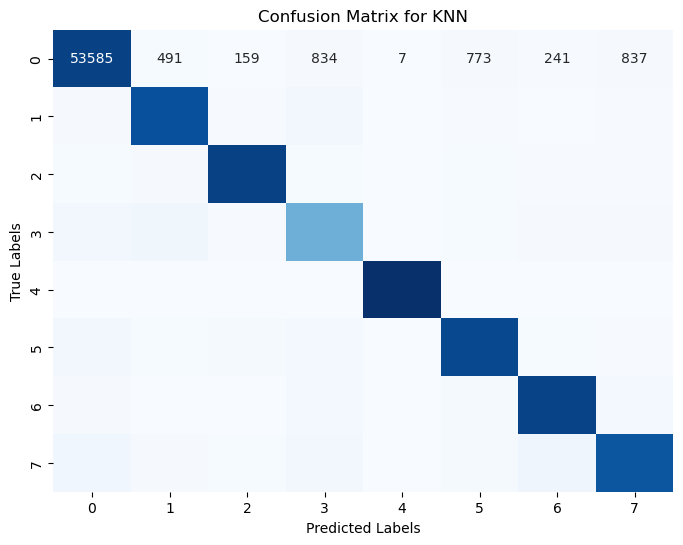

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training set
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
confusion_knn = confusion_matrix(y_test, y_pred_knn)

# Print the results
print("\nKNN Results:")
print(f"Accuracy: {accuracy_knn}")
print(f"Classification Report:\n{report_knn}")
print(f"Confusion Matrix:\n{confusion_knn}")
plot_confusion_matrix(y_test, y_pred_knn, "KNN")


Random Forest Classifier


Random Forest Results:
Accuracy: 0.9918395363026236
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56927
           1       0.99      0.99      0.99     53735
           2       1.00      0.99      0.99     57020
           3       0.99      0.98      0.99     34721
           4       1.00      1.00      1.00     57330
           5       0.99      0.99      0.99     57434
           6       0.99      0.99      0.99     57882
           7       0.99      0.99      0.99     57647

    accuracy                           0.99    432696
   macro avg       0.99      0.99      0.99    432696
weighted avg       0.99      0.99      0.99    432696

Confusion Matrix:
[[56351    45    20   220     0   232    36    23]
 [   52 53437    27    53     0    72    14    80]
 [   95    37 56679    53     0   115    21    20]
 [  254    97    16 34186     0    56    57    55]
 [    0     0     0     0 57330     0     0     0]


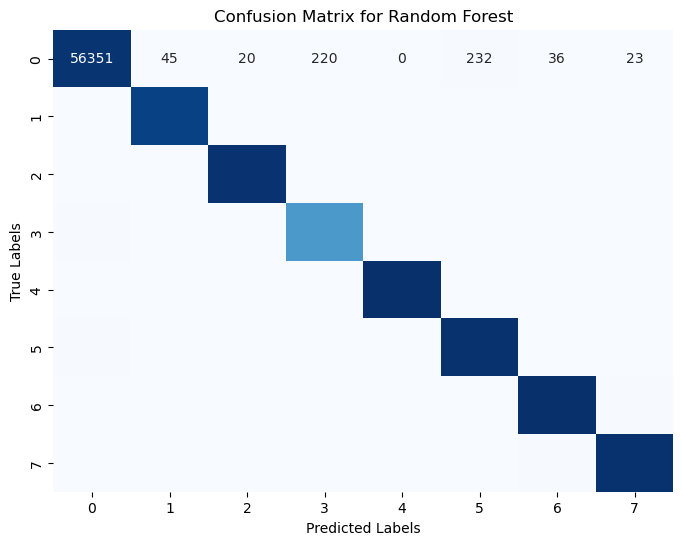

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)

# Print the results
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_rf}")
print(f"Classification Report:\n{report_rf}")
print(f"Confusion Matrix:\n{confusion_rf}")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")


Support Vector Machine (SVM)

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the SVM model
svm_model = SVC()

# Train the model on the training set
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
confusion_svm = confusion_matrix(y_test, y_pred_svm)

# Print the results
print("\nSVM Results:")
print(f"Accuracy: {accuracy_svm}")
print(f"Classification Report:\n{report_svm}")
print(f"Confusion Matrix:\n{confusion_svm}")
plot_confusion_matrix(y_test, y_pred_svm, "SVM")


NameError: name 'X_train' is not defined

Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)
confusion_gb = confusion_matrix(y_test, y_pred_gb)

# Print the results
print("\nGradient Boosting Results:")
print(f"Accuracy: {accuracy_gb}")
print(f"Classification Report:\n{report_gb}")
print(f"Confusion Matrix:\n{confusion_gb}")
# Gradient Boosting Confusion Matrix Plot
plot_confusion_matrix(y_test, y_pred_gb, "Gradient Boosting")

